In [90]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm

# Partie 1 : Régression avec Distribution Gaussienne sur des données générées

### Les Données
On utilise la biblothéque numpy afin de générer un tableau de 100 lignes et 1 colonne
les paramètres ici sont '0' pour la moyenne μ d'une distribution normale (localité), 
'1' signifie l'echelle , donc c'est le standard de deviation σ d'une distribution normale,
(100,1) c'est la forme du tableau generé.


In [91]:
#Pour le reproductibilité : 
np.random.seed(42)
# Génération des données 
X= 2*np.random.rand(100,1) # variable indépendante X
bruit_gaussienne=np.random.normal(0,1,(100,1)) # Bruit
y= 7+4*X+bruit_gaussienne # Variable dépendante y

## I ) Régression linéaire  
### 1) Génération et Visualisation des données 

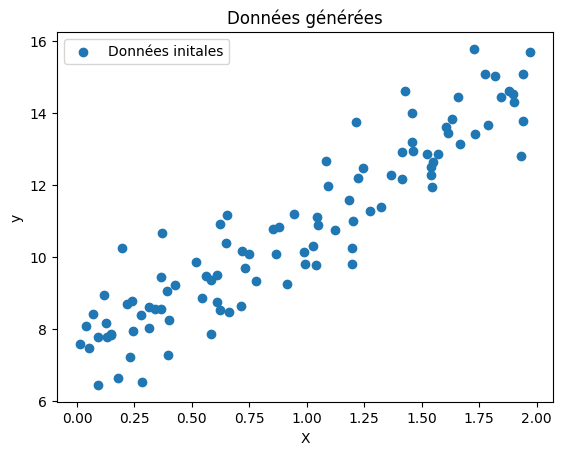

In [92]:
# Visualisation des données
plt.scatter(X, y, label='Données initales')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Données générées")
plt.legend()
plt.show()

### 2) Application d'une régression linéaire avec la distribution gaussienne
On initialise la fonction régression linéaire ; On l'ajuste pour X et y , et ici notre cible c'est X qu'on utilise pour prédire y

In [93]:
# Ajustement du modèle de régression linéaire
reg_lin=LinearRegression()
reg_lin.fit(X,y)
prediction_modele=reg_lin.predict(X)

Visualisation des prédictions sur le graphique par rapport aux données initiales

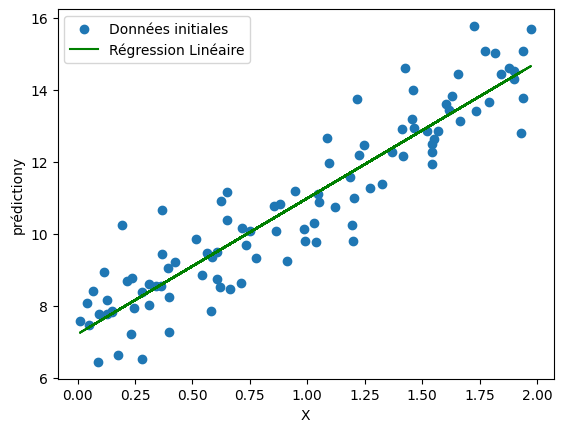

In [94]:
# Affichage de la droite de régression
plt.scatter(X,y,label='Données initiales')
plt.plot(X,prediction_modele,color='green',label='Régression Linéaire')
plt.xlabel('X')
plt.ylabel('prédictiony')
plt.legend()
plt.show()

### 3) Calculs des résidus
#### Visualisation de la distribution des résidus
Histogramme

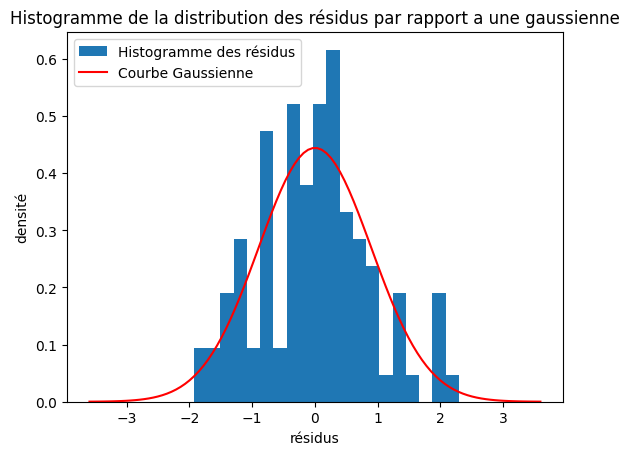

In [95]:
residus = y-prediction_modele

plt.hist(residus,bins=20,density=True,label="Histogramme des résidus")
#calcul de la moyenne des résidus
mean=residus.mean()
#calcul de l'ecart type des résidus
std=residus.std()
#générations de l'axe x pour notre gaussienne
x=np.linspace(mean-4*std,mean+4*std,100)

# création de notre courbe gaussienne (fonction de densité de probabilité)
plt.plot(x,stats.norm.pdf(x,mean,std),color = 'red',label='Courbe Gaussienne')
plt.title("Histogramme de la distribution des résidus par rapport a une gaussienne")
plt.xlabel("résidus")
plt.ylabel("densité")
plt.legend()
plt.show()


Graphique de probablilité normale Q-Q plot

Text(0.5, 1.0, 'Q-Q Plot des résidus par rapport au distribution gaussienne')

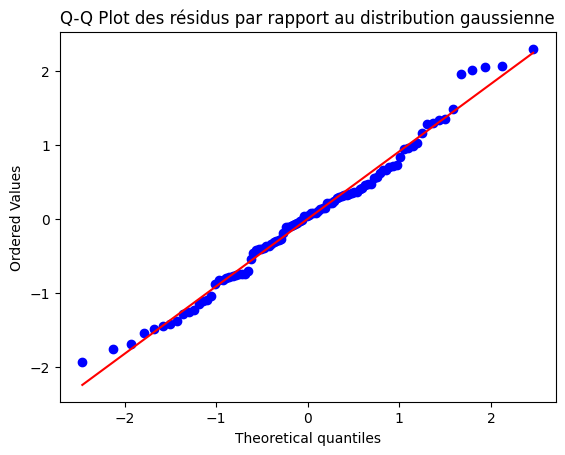

In [96]:
stats.probplot(residus.flatten(),dist='norm',fit=True,plot=plt)
plt.title("Q-Q Plot des résidus par rapport au distribution gaussienne")

### Inteprétation des resultats:
- On peut observer que d'après notre histogramme, les résidus suivent une une distribution d'une loi normale centré sur 0.
- On peut observer que d'après notre Q-Q Plot, les quantiles des résidus sont proche de la diagonale rouge qui représente une loi normale
Ainsi les résidus semblement suivre une distribution normale.
## II ) Régression polynomiale avec distribution gaussienne

### 5) Application d'une regréssion polynomiale d'un degré supérieur sur les memes données (degré 3)


In [97]:
poly_features = PolynomialFeatures(degree=3,include_bias=False) 
X_poly= poly_features.fit_transform(X)
poly_reg_modele = LinearRegression()
poly_reg_modele.fit(X_poly,y)
prediction_poly_y= poly_reg_modele.predict(X_poly)

Visualisation des prédictions du modèle :

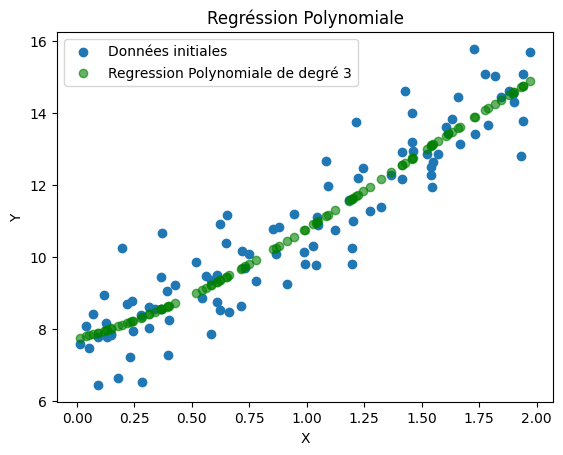

In [98]:
plt.scatter(X,y,label='Données initiales')
plt.scatter(X,prediction_poly_y,color='green',alpha=0.6,label='Regression Polynomiale de degré 3')
plt.title("Regréssion Polynomiale")
plt.xlabel("X")
plt.ylabel("Y") 
plt.legend()
plt.show()

### 6) Calcul des résidus pour la prédiction polynomiale

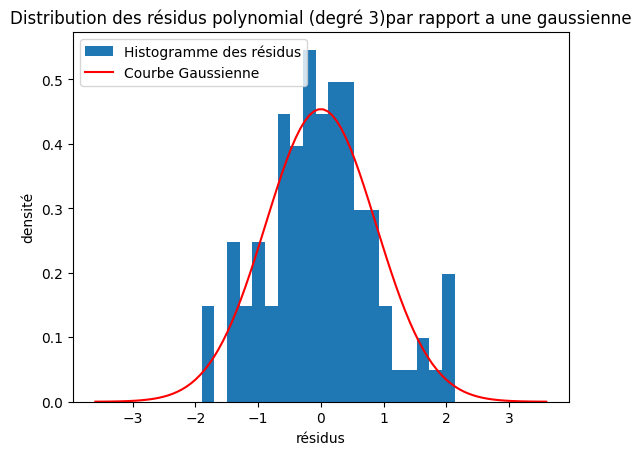

In [99]:
residus_poly= y - prediction_poly_y

#  Visulalisation de la distribution des résidus

#Histogramme
plt.hist(residus_poly,bins=20,density=True,label="Histogramme des résidus")
#calcul de la moyenne des résidus
mean_poly=residus_poly.mean()
#calcul de l'ecart type des résidus
std_poly=residus_poly.std()
#générations de l'axe x pour notre gaussienne
x_poly=np.linspace(mean-4*std,mean+4*std,100)
# création de notre courbe gaussienne (fonction de densité de probabilité)
plt.plot(x_poly,stats.norm.pdf(x_poly,mean_poly,std_poly),color = 'red',label='Courbe Gaussienne')
plt.title("Distribution des résidus polynomial (degré 3)par rapport a une gaussienne")
plt.xlabel("résidus")
plt.ylabel("densité")
plt.legend()
plt.show()

Graphique de probablité normale Q-Q plot - Polynomiale:

Text(0.5, 1.0, 'Q-Q Plot des résidus polynomiale (degré 3)  par rapport au distribution gaussienne')

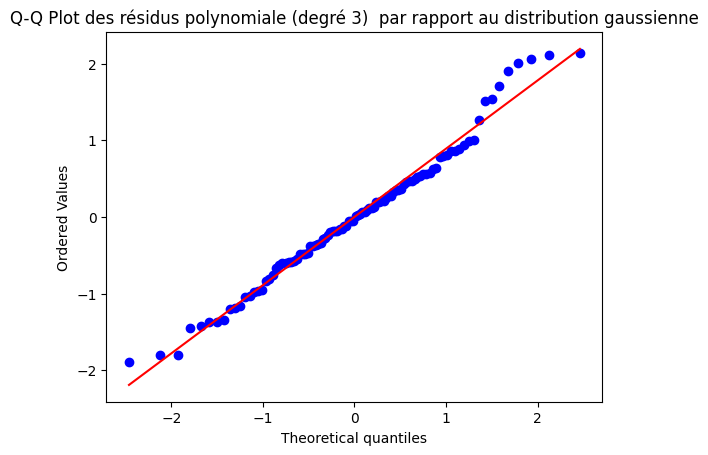

In [100]:
stats.probplot(residus_poly.flatten(),dist='norm',plot=plt)
plt.title("Q-Q Plot des résidus polynomiale (degré 3)  par rapport au distribution gaussienne")

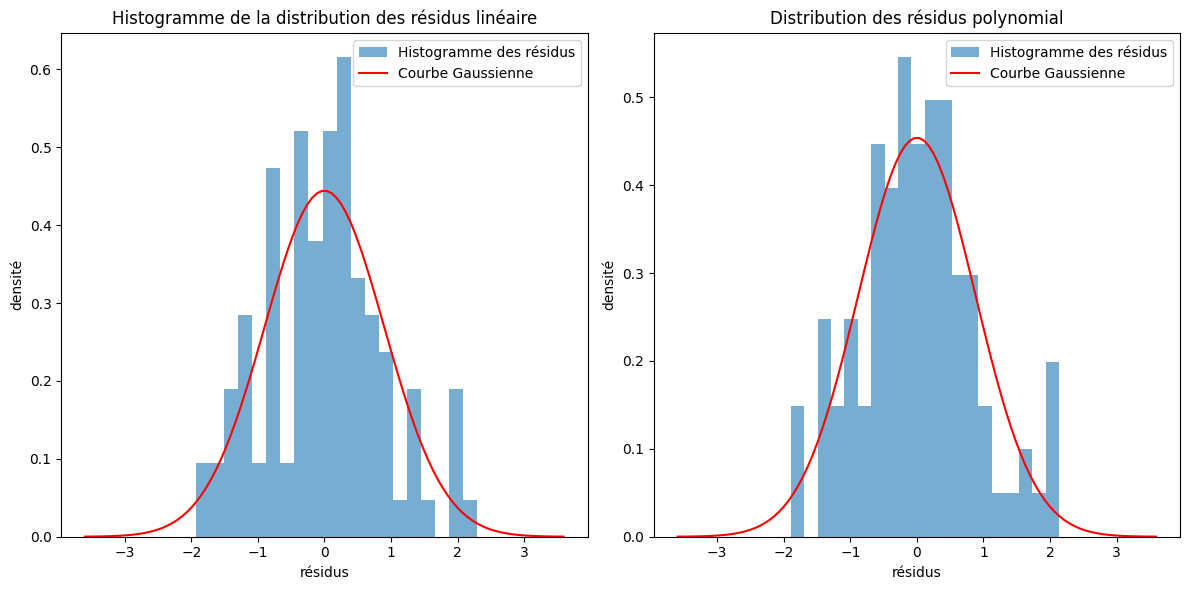

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme Linéaire
axes[0].hist(residus, bins=20, density=True, alpha=0.6, label="Histogramme des résidus")
axes[0].plot(x, stats.norm.pdf(x, mean, std), color='red', label='Courbe Gaussienne')
axes[0].set_title("Histogramme de la distribution des résidus linéaire")
axes[0].set_xlabel("résidus")
axes[0].set_ylabel("densité")
axes[0].legend()


# Histogramme Polynomiale
axes[1].hist(residus_poly, bins=20, density=True, alpha=0.6, label="Histogramme des résidus")
axes[1].plot(x_poly, stats.norm.pdf(x_poly, mean_poly, std_poly), color='red', label='Courbe Gaussienne')
axes[1].set_title("Distribution des résidus polynomial")
axes[1].set_xlabel("résidus")
axes[1].set_ylabel("densité")
axes[1].legend()

# Adjuster la mise en page et afficher les graphiques
plt.tight_layout()
plt.show()
plt.show()

## Interprétation:
Les deux histogrammes sont ajustés: centré autour de 0 et suivent une distribution normale , on peut remarquer que notre modèle polynomiale à une meilleure approximation des valeurs de la distribution

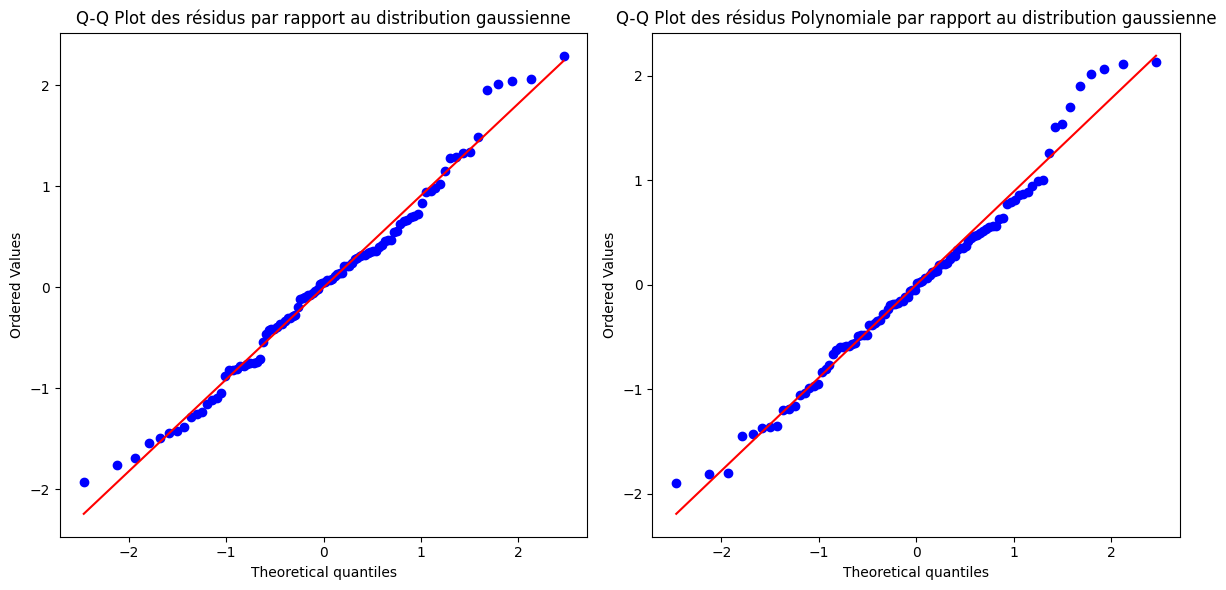

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQ-plot Linéaire
stats.probplot(residus.flatten(),dist='norm',fit=True,plot=axes[0])
axes[0].set_title("Q-Q Plot des résidus par rapport au distribution gaussienne")

# QQ-plot Polynomiale
stats.probplot(residus_poly.flatten(),dist='norm',fit=True,plot=axes[1])
axes[1].set_title("Q-Q Plot des résidus Polynomiale par rapport au distribution gaussienne")
# Adjuster la mise en page et afficher les graphiques
plt.tight_layout()
plt.show()
plt.show()

On peut observer que les deux modèles ont des résultats similaires.
### 7) Comparaison des deux modèles à l'aide de RMSE et R² 
Nous avons besoin de comparer nos deux modèles et mesurer leurs performances, pour cela on peut utiliser 
- **RMSE**(Root Mean Square Error): L'écart quadratique moyen c'est l'écart-type des résidus (erreurs de prévision).Plus la valeur est basse meilleur est l'ajustement donc le modèle
- **R²** : Le coefficient de détermination indique la proportion de variance de y par le modèle , plus elle est proche de 1 , plus le modèle est pertinent aux données 



In [103]:
rmse_lin = mean_squared_error(y,prediction_modele,squared=False) 
r2_lin = r2_score(y,prediction_modele) 

rmse_poly = mean_squared_error(y,prediction_poly_y,squared=False) 
r2_poly = r2_score(y,prediction_poly_y)

print(f"Régression Linéaire: RMSE = {rmse_lin:.2f}, R² = {r2_lin:.2f}")
print(f"Régression Polynomiale de degré 3: RMSE = {rmse_poly:.2f}, R² = {r2_poly:.2f}")


Régression Linéaire: RMSE = 0.90, R² = 0.86
Régression Polynomiale de degré 3: RMSE = 0.88, R² = 0.87


#### Comparaison
Ici on peut observer que le modèle polynomiale a légérement de meilleurs résultats (RMSE plus faible et R² plus élevé que le modèle linéaire)
donc il vaut mieux utiliser le modèle polynomiale

# Partie 2 : Régression linéaire et polynomiale sur le jeu de données 'House Price'
## I) Régression Linéaire et Polynomiale avec Visualisation et Analyse des Résidus 

### 1 ) Ajustement du modèle linéaire:
Ici on va **importer nos données** et **visualiser la relation entre les variables explicatives et la variable cible.**

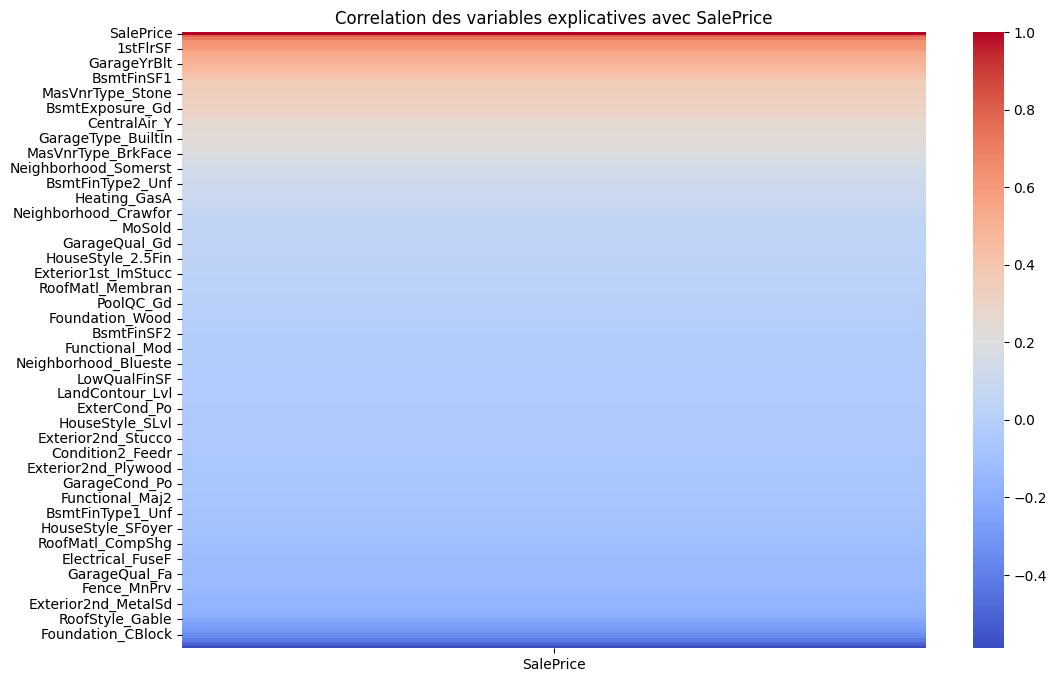

In [104]:
file_path_train = './house-prices-advanced-regression-techniques/train.csv'
file_path_test = './house-prices-advanced-regression-techniques/test.csv'

donnee_train= pd.read_csv(file_path_train)
donnee_test = pd.read_csv(file_path_test)

# définition des données d'entrainement 
X = donnee_train.drop(columns=['Id','SalePrice'])
y = donnee_train['SalePrice']


# Visualisation des variables explicative par rapport au donnée cible , on cherche la corrélation
# Encodage one hot des variables catégorielles

Z=pd.get_dummies(donnee_train,drop_first=True)

# Heatmap de la corrélation avec les variables explicatives
correlation_matrix = Z.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation des variables explicatives avec SalePrice")
plt.show()




On peut remarquer que par rapport à SalePrice, "1stFlrSF" et "GarageYrBlt" sont fortement corrélées avec "SalePrice", avec le prix de vente.
On va donc entrainer nos modèles sur ces variables explicatives à forte corrélation, donc sur **1stFlrSF** et **GarageYrBlt**


In [105]:
Features=['1stFlrSF','GarageYrBlt']
X=X[Features]
# On retire les valeurs manquantes dans les données 
X=X.dropna(axis=1)

# Séparation des données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Ajustement du modèle Linéaire et affichage des prédictions**

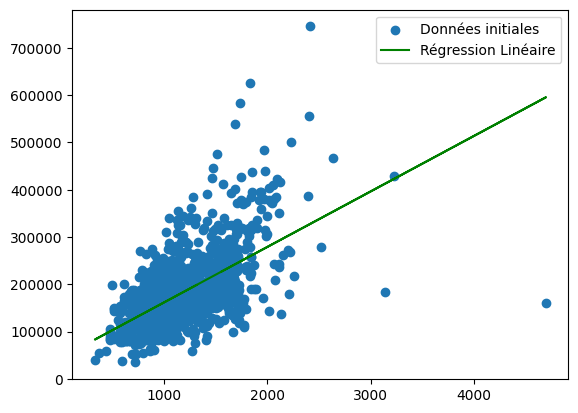

In [106]:

reg_lin_house= LinearRegression()
reg_lin_house.fit(X_train,y_train)

prediction_reg=reg_lin_house.predict(X_train)

# Visualisation des prédictions sur le graphique par rapport aux données initiales
plt.scatter(X_train,y_train,label='Données initiales')
plt.plot(X_train,prediction_reg,color='green',label='Régression Linéaire')
plt.legend()
plt.show()

**Calcul des résidus pour la prédiction linéaire et
Visulalisation de la distribution des résidus sous forme de Histogramme et Q-Q plot.**

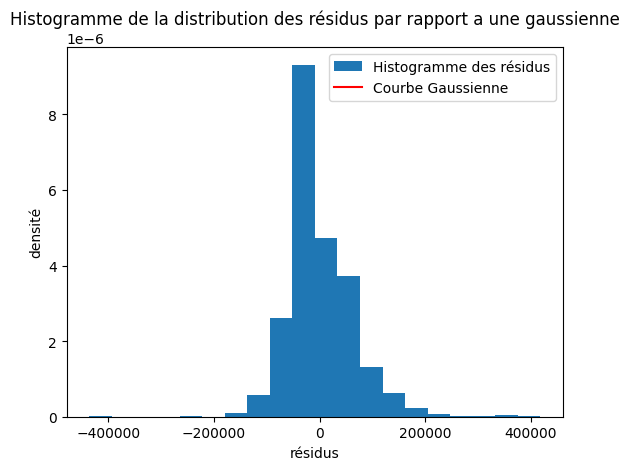

In [107]:
residus_house= y_train - prediction_reg

#Histogramme
plt.hist(residus_house,bins=20,density=True,label="Histogramme des résidus")

#calcul de la moyenne des résidus
mean_house=residus_house.mean()
#calcul de l'ecart type des résidus
std_house=residus_house.std()
#générations de l'axe x pour notre gaussienne
x_house=np.linspace(mean-4*std,mean+4*std,100)

# création de notre courbe gaussienne (fonction de densité de probabilité)
plt.plot(x,stats.norm.pdf(x_house,mean_house,std_house),color = 'red',label='Courbe Gaussienne')
plt.title("Histogramme de la distribution des résidus par rapport a une gaussienne")
plt.xlabel("résidus")
plt.ylabel("densité")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Q-Q Plot des résidus linéaire par rapport au distribution gaussienne')

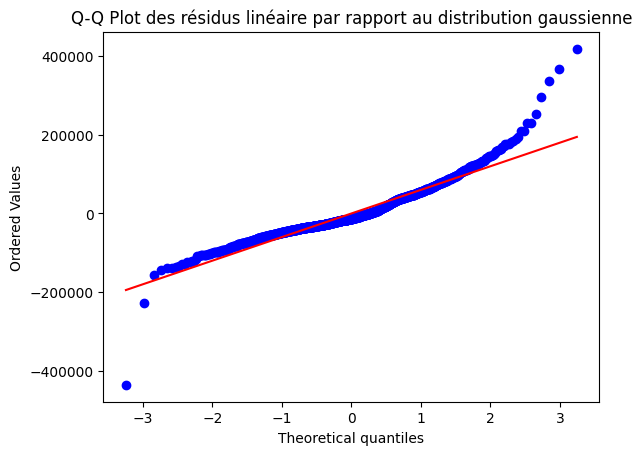

In [108]:
# Graphique de probablité normale Q-Q plot 
stats.probplot(residus_house,dist='norm',plot=plt)
plt.title("Q-Q Plot des résidus linéaire par rapport au distribution gaussienne")

### 2) Ajustement du Modèle Polynomial :
Nous allons maintenant Implémenter une régression polynomiale de degré 2 et visualiser les résultats.

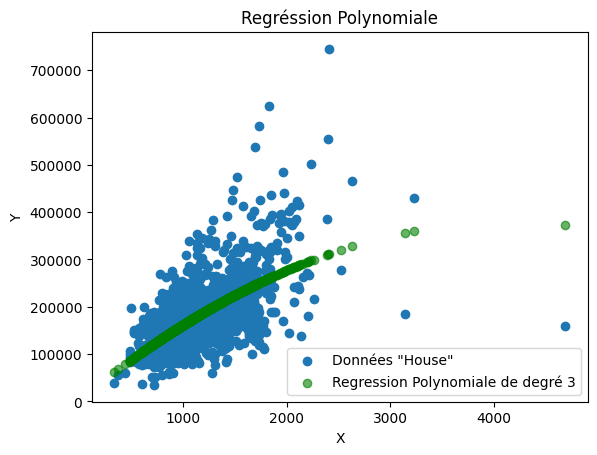

In [109]:
# 2) Application d'une regréssion polynomiale d'un degré supérieur sur les memes données (degré 2)

poly_features_house = PolynomialFeatures(degree=2,include_bias=False) 
X_poly_house= poly_features_house.fit_transform(X_train)

poly_reg_house = LinearRegression()
poly_reg_house.fit(X_poly_house,y_train)
prediction_poly_house= poly_reg_house.predict(X_poly_house)

#Visulalisation des prédictions du modèle
plt.scatter(X_train,y_train,label='Données "House"')
plt.scatter(X_train,prediction_poly_house,color='green',alpha=0.6,label='Regression Polynomiale de degré 3')
plt.title("Regréssion Polynomiale")
plt.xlabel("X")
plt.ylabel("Y") 
plt.legend()
plt.show()

**Calcul des résidus pour la prédiction polynomiale et Visulalisation de la distribution des résidus sous forme de histogramme et Q-Q plot.**

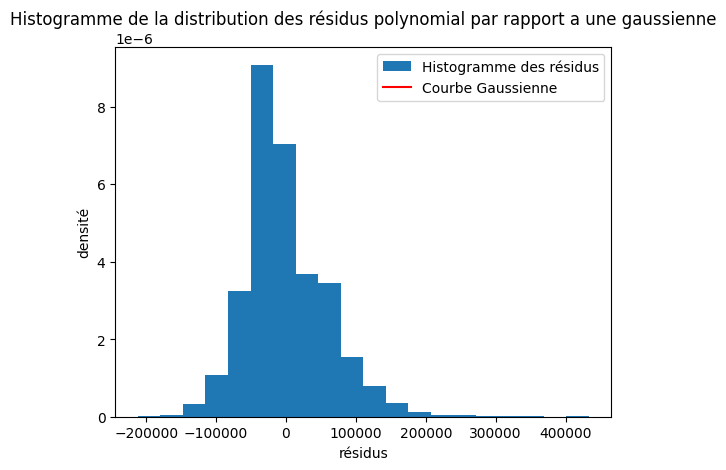

In [110]:
residus_poly_house= y_train - prediction_poly_house

#Histogramme
plt.hist(residus_poly_house,bins=20,density=True,label="Histogramme des résidus")
#calcul de la moyenne des résidus
mean_house_poly=residus_poly_house.mean()
#calcul de l'ecart type des résidus
std_house_poly=residus_poly_house.std()
#générations de l'axe x pour notre gaussienne
x_house_poly=np.linspace(mean-4*std,mean+4*std,100)
# création de notre courbe gaussienne (fonction de densité de probabilité)
plt.plot(x,stats.norm.pdf(x_house_poly,mean_house_poly,std_house_poly),color = 'red',label='Courbe Gaussienne')
plt.title("Histogramme de la distribution des résidus polynomial par rapport a une gaussienne")
plt.xlabel("résidus")
plt.ylabel("densité")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Q-Q Plot des résidus polynomiale par rapport au distribution gaussienne')

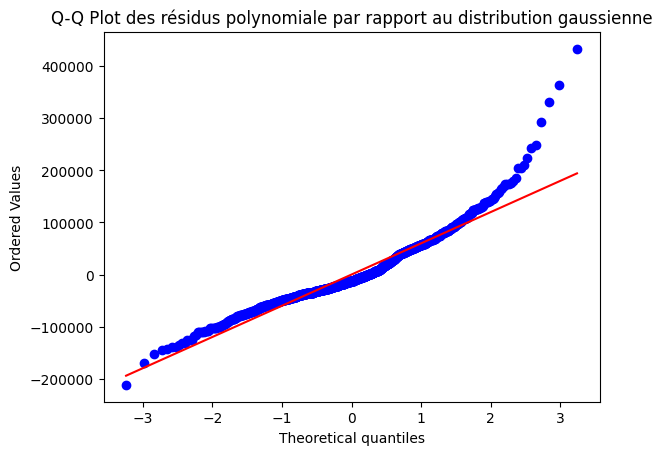

In [111]:
# Graphique de probablité normale Q-Q plot "House" - Polynomiale
stats.probplot(residus_poly_house,dist='norm',plot=plt)
plt.title("Q-Q Plot des résidus polynomiale par rapport au distribution gaussienne")

**Comparaison des deux modèles à l'aide de RMSE et R²:**

In [112]:
#RMSE(Root Mean Squared Error) mesure l'écart type,
#plus la valeur est basse meilleur est l'ajustement donc le modèle

rmse_lin = mean_squared_error(y_train,prediction_reg,squared=False) 

#R² (Coefficient de détermination) indique la proportion de variance de y par le modèle.
# plus elle est proche de 1, mieux le modèle est ajusté aux données

r2_lin = r2_score(y_train,prediction_reg) 

rmse_poly = mean_squared_error(y_train,prediction_poly_house,squared=False) 
r2_poly = r2_score(y_train,prediction_poly_house)

print(f"Régression Linéaire: RMSE = {rmse_lin:.2f}, R² = {r2_lin:.2f}")
print(f"Régression Polynomiale: RMSE = {rmse_poly:.2f}, R² = {r2_poly:.2f}")


Régression Linéaire: RMSE = 62475.28, R² = 0.35
Régression Polynomiale: RMSE = 61917.16, R² = 0.36


On peut observer que le modèle polynomiale obtient de meilleur score avec nos deux indicateurs statistiques.\
Cependant les données prédites ne semble pas être correcte due a des données abberrantes.
### 3) Régression Polynomiale avec Régularisation Ridge
Nous allons effectuer une régularisation ridge à la régression polynomiale.
Ridge est particulièrement utile pour éviter un surajustement, stabiliser les coefficients et garantir de meilleures performances sur des ensembles de test.

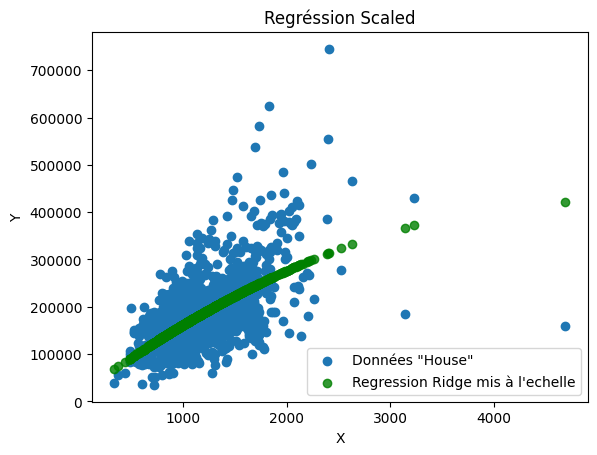

In [113]:
# Régularisation de Ridge et comparaison avec le modèle polynomiale  
ridge = Ridge(alpha=10)
# On met à l'echelle avec StandardScaler() pour avoir des résultats optimisé
scaler=StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_house)
ridge.fit(X_poly_scaled,y_train)
prediction_ridge=ridge.predict(X_poly_scaled)

#Visulalisation des prédictions du modèle
plt.scatter(X_train,y_train,label='Données "House"')
plt.scatter(X_train,prediction_ridge,color='green',alpha=0.8,label="Regression Ridge mis à l'echelle")
plt.title("Regréssion Scaled")
plt.xlabel("X")
plt.ylabel("Y") 
plt.legend()
plt.show()


Remarque: On a reussi à ignorer les valeur abberrantes.

In [114]:
#Calcul RMSE et R²
rmse_ridge = mean_squared_error(y_train,prediction_ridge,squared=False) 
r2_ridge = r2_score(y_train,prediction_ridge)

print(f"Régression Polynomiale: RMSE = {rmse_poly:.2f}, R² = {r2_poly:.2f}")
print(f"Régression Ridge: RMSE = {rmse_ridge:.2f}, R² = {r2_ridge:.2f}")


Régression Polynomiale: RMSE = 61917.16, R² = 0.36
Régression Ridge: RMSE = 61954.01, R² = 0.36


On obtient un score un peu plus élevé pour RMSE et R² reste le même ce qui est normal, Ridge est conçu pour généraliser et avoir des bonnes performances sur les données de test

**Comparons les coefficients entre le modèle sans régularisation et avec:**

In [115]:
# Comparer les Coefficients
print("\nCoefficients sans régularisation:", poly_reg_house.coef_)
print("Coefficients avec Ridge régularisation:", ridge.coef_)



Coefficients sans régularisation: [ 1.79929543e+02 -2.16303319e-02]
Coefficients avec Ridge régularisation: [ 63015.55176998 -19203.26694837]


Les coeffficients semblent donner des résultats incohérents (différence marqué entre les coefficients sans régularisation et ceux avec Ridge),ridge est censé réduire les coefficients extrêmes mais ici c'est l'effet inverse qui se produit,cela est surement due aux forte corrélation entre les termes.

## II) Validation Croisée et Intervalle de Confiance
### 4) Validation Croisé k- fold sur notre modèle linéare et polynomiale
Implémenation d'une validation croisé k-fold pour la régréssion linéaire et polynomiale, comparaison des performances moyenne entre les modèle sur chaque pli et trace des dispersion des scores.

Régression Linéaire - Moyenne R²: 0.34
Régression Polynomiale - Moyenne R²: 0.32
Régression Ridge - Moyenne R²: 0.32


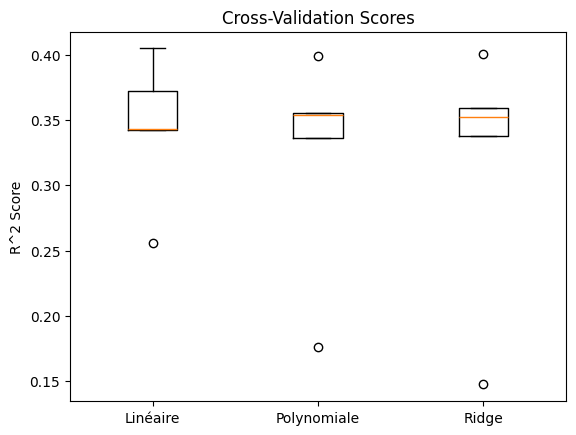

In [116]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lin_cv_scores = cross_val_score(reg_lin_house,X_train, y_train, cv=kf, scoring='r2')
poly_cv_scores = cross_val_score(poly_reg_house, X_poly_house, y_train, cv=kf, scoring='r2')
ridge_cv_scores = cross_val_score(ridge, X_poly_scaled, y_train, cv=kf, scoring='r2')

print(f"Régression Linéaire - Moyenne R²: {lin_cv_scores.mean():.2f}")
print(f"Régression Polynomiale - Moyenne R²: {poly_cv_scores.mean():.2f}")
print(f"Régression Ridge - Moyenne R²: {ridge_cv_scores.mean():.2f}")

from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Plot du dispersion des scores
plt.boxplot([lin_cv_scores, poly_cv_scores, ridge_cv_scores], tick_labels=['Linéaire', 'Polynomiale', 'Ridge'])
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')
plt.show()

On peut observer que le modèle linéaire est celui qui performe le mieux, suivi de près avec polynomiale et Ridge qui ont tout les deux le même score

### 5) Calcul des intervalles de Confiance
On va calculer les intervalles de confiance des prédictions pour le modèle polynomiale avec régularisation Ridge et expliquer le résultat

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     323.8
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          1.53e-112
Time:                        09:05:10   Log-Likelihood:                -14545.
No. Observations:                1168   AIC:                         2.910e+04
Df Residuals:                    1165   BIC:                         2.911e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+05   1814.045    100.020      0.0

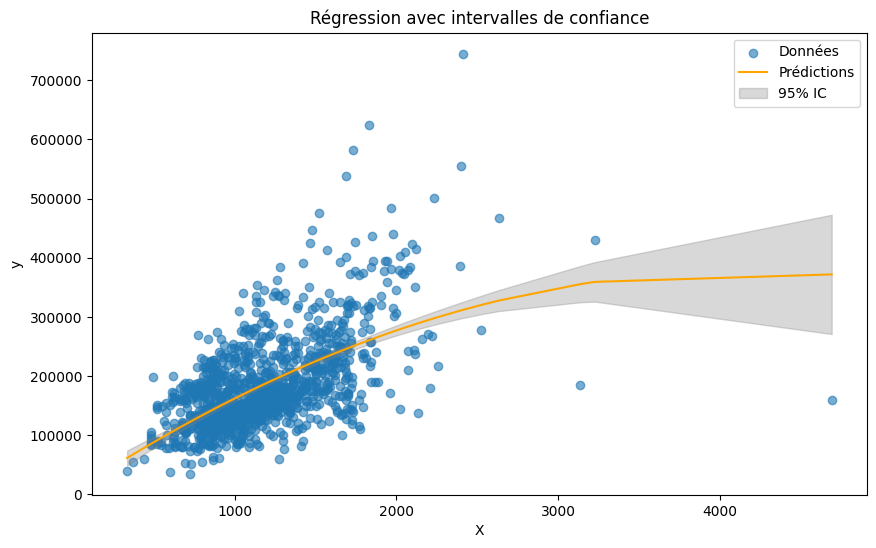

In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ajouter une constante à X_poly_scaled pour statsmodels
X_const = sm.add_constant(X_poly_scaled)

# Ajuster le modèle avec statsmodels
model = sm.OLS(y_train, X_const)
results = model.fit()

# Résumé des prédictions avec IC
predictions = results.get_prediction(X_const)
summary = predictions.summary_frame(alpha=0.05)

# Affichage un résumé des résultats
print(results.summary())

# Tri des données pour un affichage cohérent

sorted_indices = np.argsort(X_train.iloc[:, 0])
X_sorted = X_train.iloc[sorted_indices, 0]



mean_sorted = summary['mean'].iloc[sorted_indices]
ci_lower_sorted = summary['mean_ci_lower'].iloc[sorted_indices]
ci_upper_sorted = summary['mean_ci_upper'].iloc[sorted_indices]

# Tracer les prédictions avec intervalles de confiance
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0] if isinstance(X_train, pd.DataFrame) else X_train[:, 0], y_train, label='Données', alpha=0.6)
plt.plot(X_sorted, mean_sorted, label='Prédictions', color='orange')
plt.fill_between(X_sorted, ci_lower_sorted, ci_upper_sorted, color='gray', alpha=0.3, label='95% IC')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Régression avec intervalles de confiance')
plt.legend()
plt.show()


**Interprétation**:
Intervalle de confiance (IC) de 95% représente une probablilté de 95% que la valeur moyenne de y par rapport au donnée X se trouve dans cette plage de données qu'on a calculé.